# Forelæsning 11

## Konditionstal
Ændring i f(x).
Hvis x+h med h lille, hvor meget ændres f(x)?

The change is
$$f(x+h)-f(x)$$

### Absolute condition
$$\frac{change\ in\ f(x)}{change\ in\ x}$$
dette er det same som $|f'(x)|$ når  $h\to 0$

### Relative condition

Mere relevant for float er

$$\frac{relative\ change\ in\ f(x)}{relative\ change\ in\ x}$$

findes som
$$k(x)=\frac{|x||f'(x)|}{|f(x)|}$$

#### Eksempel for $f(x)=x^2$

$$k(x)=\frac{|x||2x|}{|x^2|}=2$$

dvs. den relative fejl fordobles.

### Acceptable konditionstal
1 eller 10 kan godt accepteres, 
men 10⁶ er for stort. Vi mister mange betydende cifre

### Funktioner af flere variabler

$f:\mathbb{R}^n\to \mathbb{R}, f(x_0,x_1,\cdots,x_{n-1})\in\mathbb{R}$ har gradienten
$$(\Delta f)_x=(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}, \cdots, \frac{\partial f}{\partial x_{n-1}})$$

Konditionstallet er 
$$k(x)=\frac{||x||_2||(\Delta f)_x||_2}{|f(x)|}$$

## SVD i planen.

$v = \begin{bmatrix}v_0\\v_1\end{bmatrix}$
$u = \begin{bmatrix}u_0\\u_1\end{bmatrix}$

$v\perp u$

$A=U\Sigma V^T$ (singuular value decomposition)

$\implies \sigma_0u_0v^T_0+\sigma_1u_1v_1^T$


$\implies \begin{bmatrix}\sigma_0u_0 & \sigma_1u_1\end{bmatrix} \begin{bmatrix}v_0\\v_1\end{bmatrix}$

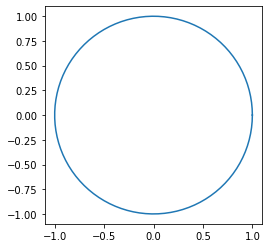

In [1]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,2*np.pi,100)

x = np.cos(theta)
y = np.sin(theta)

circle = np.array([x,y])

fix, ax = plt.subplots()
ax.set_aspect("equal")

ax.plot(*circle)

[[ 24.04017955  27.09322566]
 [ -3.77125732 -43.69054457]]


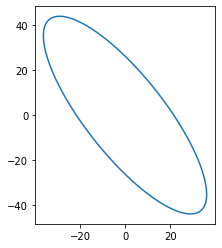

In [2]:
a = np.random.normal(0.0,25,(2,2))

print(a)

fix, ax = plt.subplots()
ax.set_aspect("equal")

ax.plot(*(a @ circle))

In [3]:
np.linalg.svd(a)

(array([[-0.61920901,  0.78522621],
        [ 0.78522621,  0.61920901]]),
 array([54.11126193, 17.52228606]),
 array([[-0.32982387, -0.94404248],
        [ 0.94404248, -0.32982387]]))

In [4]:
u, s, vt = np.linalg.svd(a)
print (u)
print (s)
print (vt)

[[-0.61920901  0.78522621]
 [ 0.78522621  0.61920901]]
[54.11126193 17.52228606]
[[-0.32982387 -0.94404248]
 [ 0.94404248 -0.32982387]]


In [5]:
u.T @ u # Orthogonal

array([[1.00000000e+00, 2.67119712e-17],
       [2.67119712e-17, 1.00000000e+00]])

In [6]:
vt @ vt.T # Orthogonal

array([[ 1.00000000e+00, -1.00384192e-17],
       [-1.00384192e-17,  1.00000000e+00]])

In [7]:
s # singuular values

array([54.11126193, 17.52228606])

In [8]:
np.diag(s) # the matrix \Sigma

array([[54.11126193,  0.        ],
       [ 0.        , 17.52228606]])

In [9]:
A = u @ np.diag(s) @ vt # The A matrix.
print(A)

[[ 24.04017955  27.09322566]
 [ -3.77125732 -43.69054457]]


## SVD generalt

Every matrix $A\in \mathbb{R}^{m\times n}$ has a SVD.

$$A=U\Sigma V^T$$
med $U\in \mathbb{R}^{m\times m}$ og $V\in \mathbb{R}^{n\times n}$ med $\Sigma\in \mathbb{R}^{m\times n}$ end diagonal matrix
$$\Sigma = diag(\sigma_0,\cdots,\sigma_{k-1}, k=min(m,n)$$
og med $\sigma_0\geq \sigma_1\geq \cdots \geq \sigma_{k-1}\geq 0$

### Thin and shortened SVD
$A\in \mathbb{R}^{m\times n}$

Since $k=min(m,n)$ we throw away the remaining $|m-n|$ entries away

#### Shortened SVD

$\sigma_0u_0v^T_0+\sigma_1u_1v_1^T +\cdots + \sigma_{r-1}u_{r-1}v^T_{r-1} $

we can often find $r<k$ and still get a good approximation of $A$

In [10]:
rng = np.random.default_rng()

In [11]:
n = 1000
a = np.array([[1.,5.],[1.,-1.]]) @ rng.standard_normal((2,n))

In [12]:
np.abs(a).max()

20.690446561528073

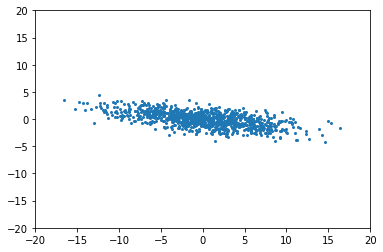

In [13]:
fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.plot(*a, 'o', markersize=2)

In [14]:
a.shape

(2, 1000)

In [15]:
u, s, vt = np.linalg.svd(a)
u.shape, s.shape, vt.shape # The vt.shape is a 1000x1000, which is unnecesary

((2, 2), (2,), (1000, 1000))

In [16]:
u, s, vt = np.linalg.svd(a, full_matrices=False) # thin SVD
u.shape, s.shape, vt.shape # Note how it becomes a 2x1000 matrix instead.

((2, 2), (2,), (2, 1000))

In [17]:
reconstructed_a = u @ np.diag(s) @ vt
np.allclose(a, reconstructed_a, atol=np.finfo(float).eps) # Check that they are equal(and within machine epsilon)

True

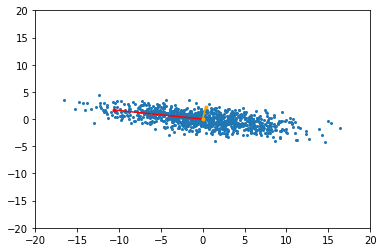

In [18]:
origo = np.zeros((2,1))
scale = 2 / np.sqrt(n)
tscale = 1.2 * scale

fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)

ax.plot(*a, 'o', markersize=2) # blue points of a

ax.plot(*(np.hstack([origo, u[:,[0]] * s[0] * scale])),  #u_0 s_0 skalaret
       'red', marker='.')
ax.plot(*(np.hstack([origo, u[:,[1]] * s[1] * scale])),  #u_1 s_1 skalaret
       'orange', marker='.')

#### Removing noise from images

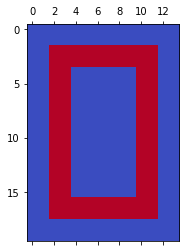

In [19]:
a = np.zeros((20,14))
a[2,2:12] = 1
a[3,2:12] = 1
a[16,2:12] = 1
a[17,2:12] = 1
a[2:18,2] = 1
a[2:18,3] = 1
a[2:18,10] = 1
a[2:18,11] = 1

fig, ax = plt.subplots()
ax.matshow(a, cmap='coolwarm')

In [20]:
# Now we add some noise to the image
a+= 1.5 * rng.random(a.shape)

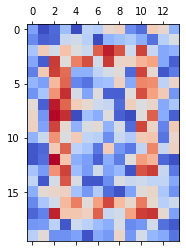

In [21]:
# Now show the new image
fig, ax = plt.subplots()
ax.matshow(a, cmap='coolwarm')

In [22]:
u, s, vt = np.linalg.svd(a, full_matrices=False)
s

array([18.84338923,  4.54042789,  3.26989595,  3.02077074,  2.69941488,
        2.28426805,  2.05869109,  1.77692873,  1.6919456 ,  1.46476708,
        1.03814938,  0.81665229,  0.66280556,  0.26427552])

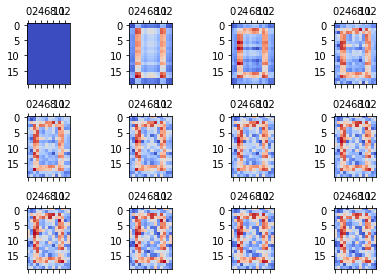

In [23]:
# Vi tager de første k værdier
def svdapprox(u, s, vt, k):
    return u[:, :k] @ np.diag(s[:k]) @ vt[:k, :]

fig, axs = plt.subplots(3,4)

for r, (i,j) in enumerate(np.ndindex(axs.shape)):
    axs[i,j].matshow(svdapprox(u, s, vt, r), cmap='coolwarm')
    
plt.tight_layout()

#### With actual images

In [24]:
import matplotlib

a = plt.imread('img/noisedImg.png') # Import image
plt.rcParams['figure.dpi'] = 150 # increase DPI
a.shape

(271, 338, 3)

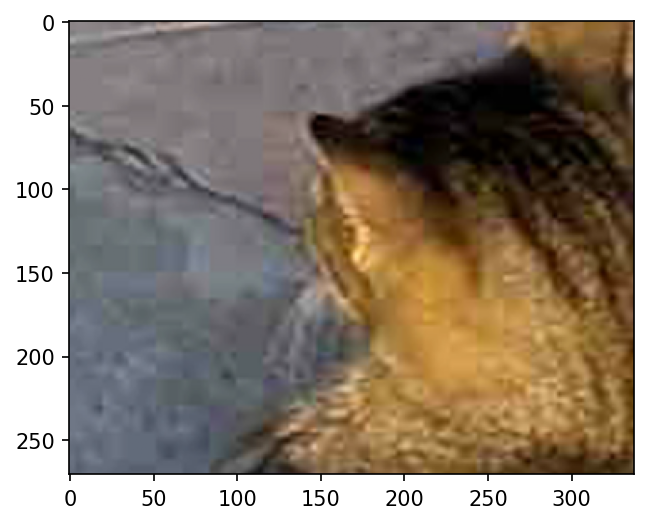

In [25]:
fix, ax = plt.subplots()
ax.imshow(a) # plot the image

In [26]:
pixelCount = a.shape[0] * a.shape[1]
pixelCount

91598

In [27]:
# Picking only the red channel
b = a[:,:,0]
b.shape

(271, 338)

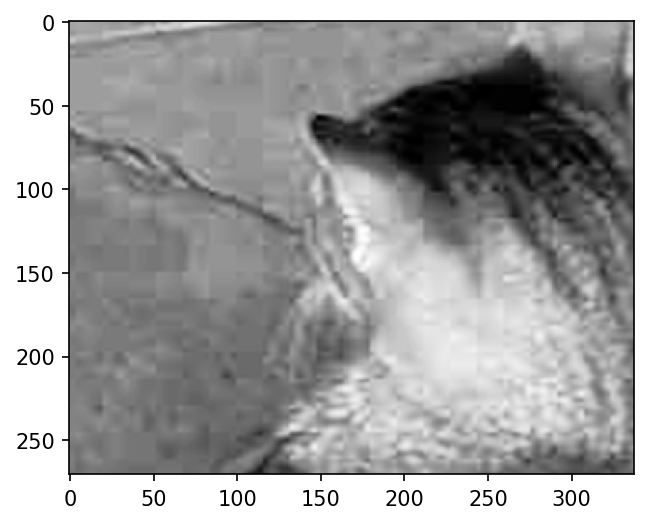

In [28]:
fix, ax = plt.subplots()
ax.imshow(b, cmap='Greys_r')

In [29]:
# Svd
u, s, vt = np.linalg.svd(b, full_matrices=False)

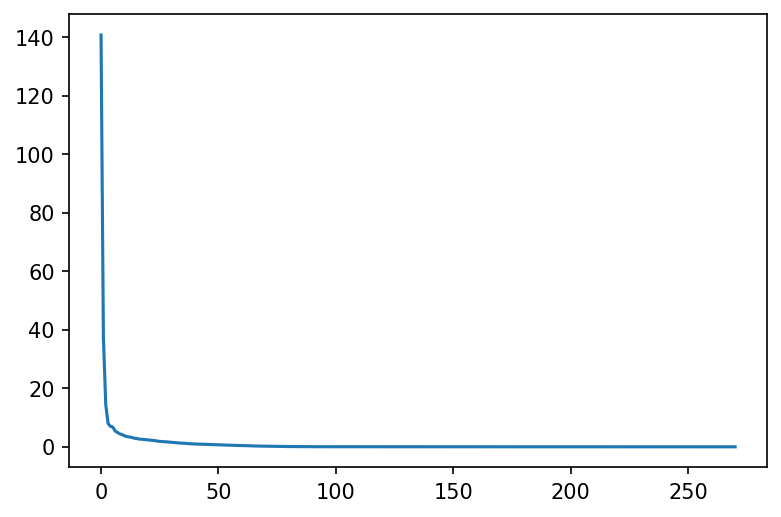

In [30]:
fig, ax = plt.subplots()
ax.plot(s)

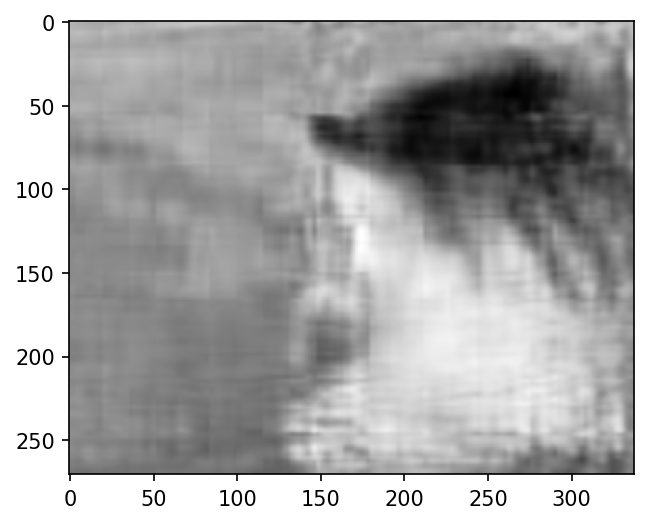

In [31]:
fig, ax = plt.subplots()
ax.imshow(u[:,:10] @ np.diag(s[:10]) @ vt[:10,:], cmap='Greys_r') # with r=10

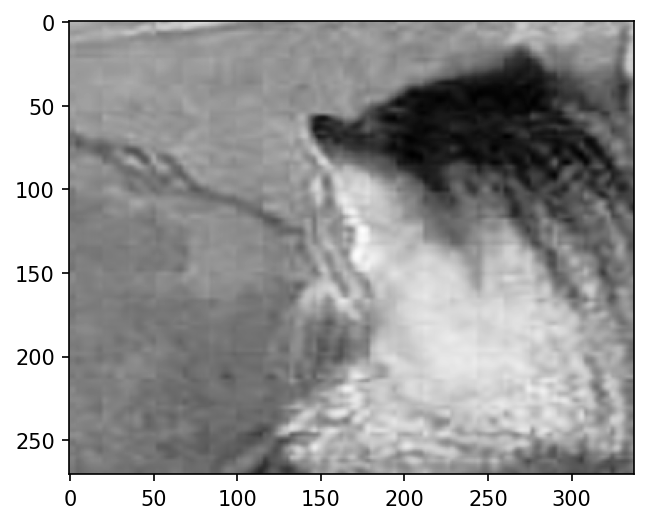

In [32]:
fig, ax = plt.subplots()
ax.imshow(u[:,:30] @ np.diag(s[:30]) @ vt[:30,:], cmap='Greys_r') # with r = 30

# Exercises
# 5.1
Lad $a$ være en ndarray med 2 akser. Forklar hvad operationerne gør

In [33]:
#(a)
a = np.ndarray((8, 8))
a[0,[1,3,4,6]] = 1 # sets, indices 1,3,4,6 to 1 on the first row (row 0)
print(np.around(a, 2))

[[18.84  1.    0.    1.    1.    0.    1.    0.  ]
 [ 0.    4.54  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    3.27  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    3.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    2.7   0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    2.28  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    2.06  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    1.78]]


In [34]:
#(b)
a = np.zeros((8, 8))
a[[1,2],[2,3]] = np.array([5,7]) # sets [1,2] and [2,3] to the numbers 5,7 respective of f
print(np.around(a, 2))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 0. 7. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
#(c)
n = 8
a = np.ndarray((n, n))

i = 0
for x in range(n):
    for y in range(n):
        a[x,y] = y
        i+=1

print(np.around(a, 2), "\n\n After ")
a[:, [3,1]] = a[:, [1,3]] # Swaps the columns 1 and 3
print(np.around(a, 2))

[[0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]
 [0. 1. 2. 3. 4. 5. 6. 7.]] 

 After 
[[0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]
 [0. 3. 2. 1. 4. 5. 6. 7.]]


In [36]:
#(d)
n = 8
a = np.ndarray((n, n))

for x in range(n):
    for y in range(n):
        a[x,y] = x

print(np.around(a, 2), "\n\n After ")
a[2:5, 0] = np.array([0, 1, 2]) # Inserts the array 0,1,2 into [2,0],[3,0],[4,0] respective to their order
print(np.around(a, 2))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7.]] 

 After 
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 2. 2. 2. 2. 2. 2. 2.]
 [1. 3. 3. 3. 3. 3. 3. 3.]
 [2. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7.]]


In [37]:
#(d)
n = 10
a = np.ndarray((n, n))

for x in range(n):
    for y in range(n):
        a[x,y] = x
        
print(np.around(a, 2), "\n\n After ")
a[2, 3:8:2] += 6 # Adds 6 to all entries in 3-8 with a 2-step checker pattern
print(np.around(a, 2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]] 

 After 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 8. 2. 8. 2. 8. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]]


# 5.2

In [38]:
A = np.array([[1,2,2,1,0,0.],[2,1,-1,0,1,0.],[-1,2,1,0,0,1.]])
A
print(A)

A[1, :] += - 2 * A[0, :]
print("r1 +=-2(r0) \n\n",A)

A[2, :] += A[0, :]
print("\n\n",A)

A[1, :] = - 1/3 * A[1, :]
print("\n\n", np.around(A,2))

A[2, :] += -4 * A[1, :]
print("\n\n", np.around(A,2))

A[2, :] = -(1/(3+(2/3))) * A[2, :]
print("\n\n", np.around(A,2))

A[1, :] += - (1+(2/3))* A[2, :]
print("\n\n", np.around(A,2))

A[0, :] += - 2 * A[2, :]
print("\n\n", np.around(A,2))

A[0, :] += - 2 * A[1, :]
print("\n\n", np.around(A,2))

print("\n\n")

print("A^-1 =")
print(A[:,3:6])

[[ 1.  2.  2.  1.  0.  0.]
 [ 2.  1. -1.  0.  1.  0.]
 [-1.  2.  1.  0.  0.  1.]]
r1 +=-2(r0) 

 [[ 1.  2.  2.  1.  0.  0.]
 [ 0. -3. -5. -2.  1.  0.]
 [-1.  2.  1.  0.  0.  1.]]


 [[ 1.  2.  2.  1.  0.  0.]
 [ 0. -3. -5. -2.  1.  0.]
 [ 0.  4.  3.  1.  0.  1.]]


 [[ 1.    2.    2.    1.    0.    0.  ]
 [-0.    1.    1.67  0.67 -0.33 -0.  ]
 [ 0.    4.    3.    1.    0.    1.  ]]


 [[ 1.    2.    2.    1.    0.    0.  ]
 [-0.    1.    1.67  0.67 -0.33 -0.  ]
 [ 0.    0.   -3.67 -1.67  1.33  1.  ]]


 [[ 1.    2.    2.    1.    0.    0.  ]
 [-0.    1.    1.67  0.67 -0.33 -0.  ]
 [-0.   -0.    1.    0.45 -0.36 -0.27]]


 [[ 1.    2.    2.    1.    0.    0.  ]
 [ 0.    1.    0.   -0.09  0.27  0.45]
 [-0.   -0.    1.    0.45 -0.36 -0.27]]


 [[ 1.    2.    0.    0.09  0.73  0.55]
 [ 0.    1.    0.   -0.09  0.27  0.45]
 [-0.   -0.    1.    0.45 -0.36 -0.27]]


 [[ 1.    0.    0.    0.27  0.18 -0.36]
 [ 0.    1.    0.   -0.09  0.27  0.45]
 [-0.   -0.    1.    0.45 -0.36 -0.27]]



A^-1 =


## 5.3

In [39]:
u = np.array([[1.],[-1],[2]])
v = np.array([[1],[2],[-1],[-2]])

A = u*v.T
print(A)

# (a) Hvor mange pivot elementer har den?
# Svaret er 3. Pivot elementer er det første ikke-nul indgang i hver række

[[ 1.  2. -1. -2.]
 [-1. -2.  1.  2.]
 [ 2.  4. -2. -4.]]


(b)

Hvis $B = uv^T$ og $u\in\mathbb{R}^n,v\in\mathbb{R}^m$ hvor mange kan der da være?

Svaret er $n$ elementer da den danne en $n\times m$ matrice.

# Forelæsning 12

## Vektorrum
en mængde $V$ med to operationer

sum operation: $u+v \in V \forall u,v \in V$

$$(V1) u+v = v+u$$
$$(V2) (u+v)+w = u+(v+w)$$
$$(V3)$$
$$(V4)$$
$$(V5)$$
$$(V6)$$
$$(V7)$$
$$(V8)$$

### Eksempler

In [41]:
#V \in R^n
V = np.array([1,2,3,4,5])[:, np.newaxis]
V

array([[1],
       [2],
       [3],
       [4],
       [5]])

## Komplekse tal
z = x+iy

x,y \in \R. i et object med i²=-1

x = re(z) er den reelle del

y = im(z) er den imaginære del


for z=1+2i, w=-2+3i

z+w = (1+2i)+(-2+3i)=1+(-2)+i(2+3)=-1+5i


#### Regneregler
$z+w = (x+iy)+(s+it)=(x+s)+i(y+t)$

$|z| = \sqrt{x²+y²}$

In [44]:
z = 1. + 2.j
z

(1+2j)

In [45]:
type(z)

complex

In [46]:
type(1.j)

complex

In [47]:
np.real(z)

1.0

In [48]:
np.imag(z)

2.0

In [50]:
z == np.real(z)+np.imag(z)*(1.j)

True

In [52]:
w = -2. + 3.j
z + w

(-1+5j)

In [53]:
z*w

(-8-1j)

In [54]:
1/z

(0.2-0.4j)

In [55]:
z, np.conj(z), np.abs(z)

((1+2j), (1-2j), 2.23606797749979)

In [56]:
np.abs(z)**2

5.000000000000001

In [57]:
np.real(z)**2+np.imag(z)**2

5.0

In [58]:
np.conj(z) / np.abs(z)**2

(0.19999999999999996-0.3999999999999999j)

In [69]:
a = np.array([[1.+0.j, 0.+2.j],[2.+1.j,-1.+0.j]])
a

array([[ 1.+0.j,  0.+2.j],
       [ 2.+1.j, -1.+0.j]])

In [70]:
a.dtype

dtype('complex128')

In [71]:
b = np.array([3.0, 4.+1.j])[:,np.newaxis]
b

array([[3.+0.j],
       [4.+1.j]])

In [80]:
aub = np.hstack([a, b])
aub

array([[ 1.+0.j,  0.+2.j,  3.+0.j],
       [ 2.+1.j, -1.+0.j,  4.+1.j]])

In [81]:
aub[1, :] += -(2.+1.j) * aub[0, :]
aub

array([[ 1.+0.j,  0.+2.j,  3.+0.j],
       [ 0.+0.j,  1.-4.j, -2.-2.j]])

In [82]:
aub[1, :] *= 1/(1.-4j)
np.around(aub,2)

array([[1.  +0.j  , 0.  +2.j  , 3.  +0.j  ],
       [0.  +0.j  , 1.  +0.j  , 0.35-0.59j]])

In [83]:
aub[0, :] += -2.j*aub[1, :]
np.around(aub,2)

array([[1.  +0.j  , 0.  +0.j  , 1.82-0.71j],
       [0.  +0.j  , 1.  +0.j  , 0.35-0.59j]])

In [84]:
x = aub[:, [-1]]
x

array([[1.82352941-0.70588235j],
       [0.35294118-0.58823529j]])

In [85]:
# Check løsning
a @ x - b

array([[ 0.0000000e+00+0.j],
       [-4.4408921e-16+0.j]])